# Practical Part A [15 Points]
##### Use the Lab2_dataset.csv provided. Your target in this part will be classify texts into Spam vs Not Spam using the Naive Bayes algorithms and comparing them to another type of classification model and comment on the results.

## Preprocessing [5 Points]
##### • Load the dataset
##### • Use the [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) function in sklearn to transform the "text" feature to a vector representation of a predetermined size.
##### • Split the dataset into training and testing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

In [4]:


data_Lab2_JB = pd.read_csv('./Lab2_dataset.csv')
data_Lab2_JB.head()
data_Lab2_JB


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer(max_features=5)  # Specify the max number of features

# Transform the 'text' column to a vectorized representation
X = vectorizer.fit_transform(data_Lab2_JB['text']).toarray()

# Get target variable
y = data_Lab2_JB['label_num']  # Assuming the target column is named 'label_num'


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shape of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3878, 5) (1293, 5) (3878,) (1293,)


## Model Training and Evaluation [10 Points]


##### • Train the Sklearn RandomForestClassifier model on the training dataset and evaluate on the test set
##### • Train and evaluate also on the Gaussian and Multinomial Naiive Bayes Classifiers
##### • Compare between the performance of all models and comment on the reasons behind the differences seen between the three models.
##### ***• Note that the RandomForestClassifier model doesn't make the same assumptions as the other Naiive Bayes models***

In [7]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Classifier Results:")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       930
           1       0.59      0.52      0.55       363

    accuracy                           0.76      1293
   macro avg       0.70      0.69      0.69      1293
weighted avg       0.75      0.76      0.76      1293



In [8]:
# Since GaussianNB expects 2D array input, we will reshape
gnb_model = GaussianNB()

# Fit the model
gnb_model.fit(X_train, y_train)

# Make predictions
gnb_predictions = gnb_model.predict(X_test)

# Evaluate performance
print("Gaussian Naive Bayes Results:")
print(classification_report(y_test, gnb_predictions))


Gaussian Naive Bayes Results:
              precision    recall  f1-score   support

           0       1.00      0.25      0.39       930
           1       0.34      1.00      0.51       363

    accuracy                           0.46      1293
   macro avg       0.67      0.62      0.45      1293
weighted avg       0.81      0.46      0.43      1293



In [9]:
# Initialize Multinomial Naive Bayes
mnb_model = MultinomialNB()

# Fit the model
mnb_model.fit(X_train, y_train)

# Make predictions
mnb_predictions = mnb_model.predict(X_test)

# Evaluate performance
print("Multinomial Naive Bayes Results:")
print(classification_report(y_test, mnb_predictions))


Multinomial Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       930
           1       0.34      0.51      0.41       363

    accuracy                           0.58      1293
   macro avg       0.55      0.56      0.54      1293
weighted avg       0.64      0.58      0.60      1293



label
ham     3672
spam    1499
Name: count, dtype: int64
(5171, 5)
0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: label_num, dtype: int64
(3878, 5) (1293, 5) (3878,) (1293,)


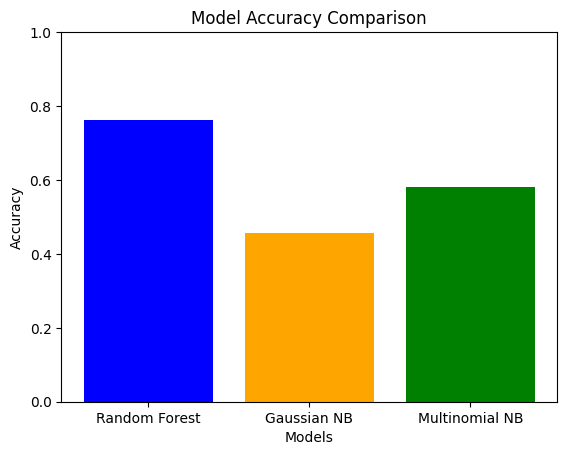

In [11]:
# Store the precision, recall, and f1 scores for comparison
models = ['Random Forest', 'Gaussian NB', 'Multinomial NB']
accuracies = [
    rf_model.score(X_test, y_test),
    gnb_model.score(X_test, y_test),
    mnb_model.score(X_test, y_test)
]
print(data_Lab2_JB['label'].value_counts())
print(X.shape)  # should return (number_of_samples, max_features)
print(y[:10])  # Display the first few labels
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Plotting the accuracies
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

##### Random Forest outperforms Naive Bayes models in terms of accuracy and overall performance due to its superior handling of class imbalance.

##### Gaussian Naive Bayes faces challenges with accuracy and lacks balanced performance.

##### Multinomial Naive Bayes outperforms Gaussian Naive Bayes by a small margin but falls short compared to Random Forest.

In [19]:
data_Lab2_2019_JB = pd.read_csv('./AB_NYC_2019.csv')
print(data_Lab2_2019_JB.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [20]:
data_Lab2_2019_JB = data_Lab2_2019_JB[data_Lab2_2019_JB['price'].notna()]

In [21]:
from scipy import stats


In [22]:
z_scores = stats.zscore(data_Lab2_2019_JB['price'])
abs_z_scores = abs(z_scores)
print(abs_z_scores)

z_threshold = 3
clean_data_z = data_Lab2_2019_JB[abs_z_scores < z_threshold]

0        0.015493
1        0.300974
2        0.011329
3        0.265335
4        0.302811
           ...   
48890    0.344452
48891    0.469373
48892    0.157070
48893    0.406912
48894    0.261171
Name: price, Length: 48895, dtype: float64


In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_Lab2_2019_JB['price'].quantile(0.25)
Q3 = data_Lab2_2019_JB['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data_Lab2_2019_JB
clean_data_iqr = data_Lab2_2019_JB[(data_Lab2_2019_JB['price'] >= lower_bound) & (data_Lab2_2019_JB['price'] <= upper_bound)]


In [24]:
# Output the number of records before and after cleaning
print(f"Original dataset size: {data_Lab2_2019_JB.shape[0]}")
print(f"Size after Z-score outlier removal: {clean_data_z.shape[0]}")
print(f"Size after IQR outlier removal: {clean_data_iqr.shape[0]}")


Original dataset size: 48895
Size after Z-score outlier removal: 48507
Size after IQR outlier removal: 45923


In [25]:
print("Z-score cleaned data price statistics:")
print(clean_data_z['price'].describe())

print("IQR cleaned data price statistics:")
print(clean_data_iqr['price'].describe())

Z-score cleaned data price statistics:
count    48507.000000
mean       138.746903
std        107.558233
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64
IQR cleaned data price statistics:
count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64


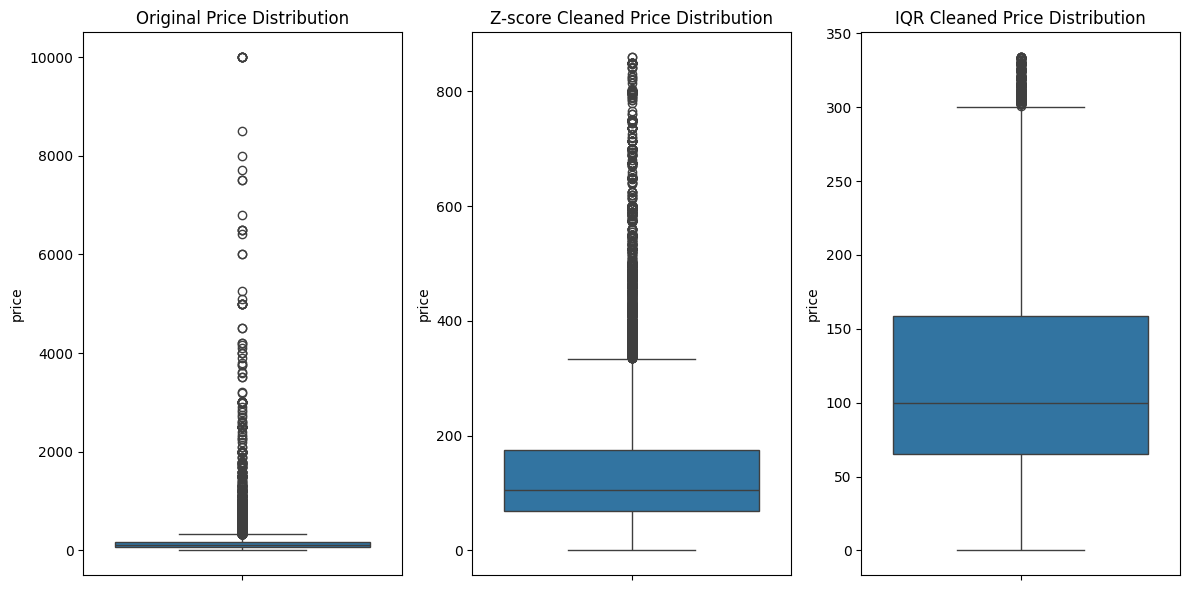

In [26]:
plt.figure(figsize=(12, 6))

# Boxplot before cleaning
plt.subplot(1, 3, 1)
sns.boxplot(y=data_Lab2_2019_JB['price'])
plt.title('Original Price Distribution')

# Z-score cleaned
plt.subplot(1, 3, 2)
sns.boxplot(y=clean_data_z['price'])
plt.title('Z-score Cleaned Price Distribution')

# IQR cleaned
plt.subplot(1, 3, 3)
sns.boxplot(y=clean_data_iqr['price'])
plt.title('IQR Cleaned Price Distribution')

plt.tight_layout()
plt.show()